##2.1

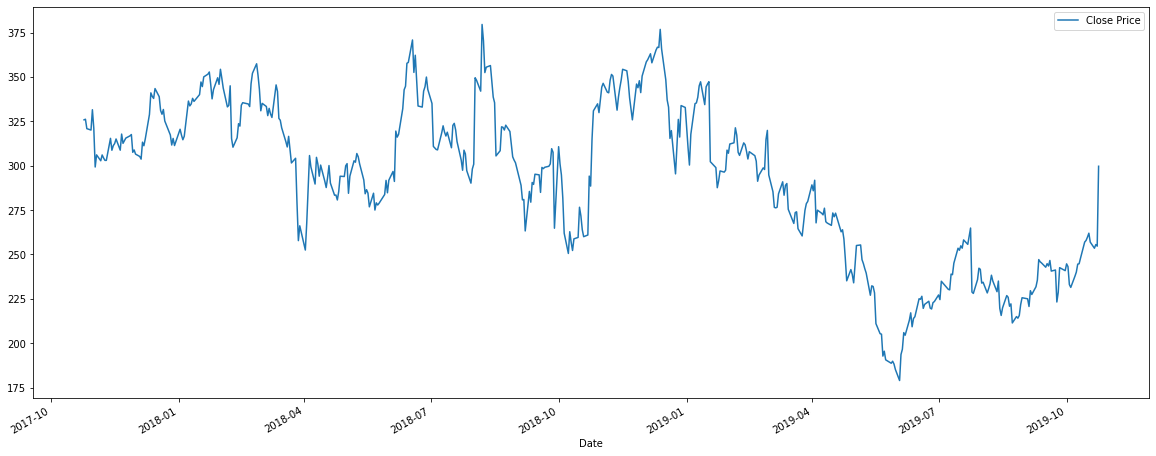

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('week2.csv')
df['Date']= pd.to_datetime(df['Date'])
da = [i for i in df["Date"]]
df.set_index("Date", inplace = True)

del df["Unnamed: 0"]
df.plot(y = "Close Price", figsize=(20,8))

##2.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

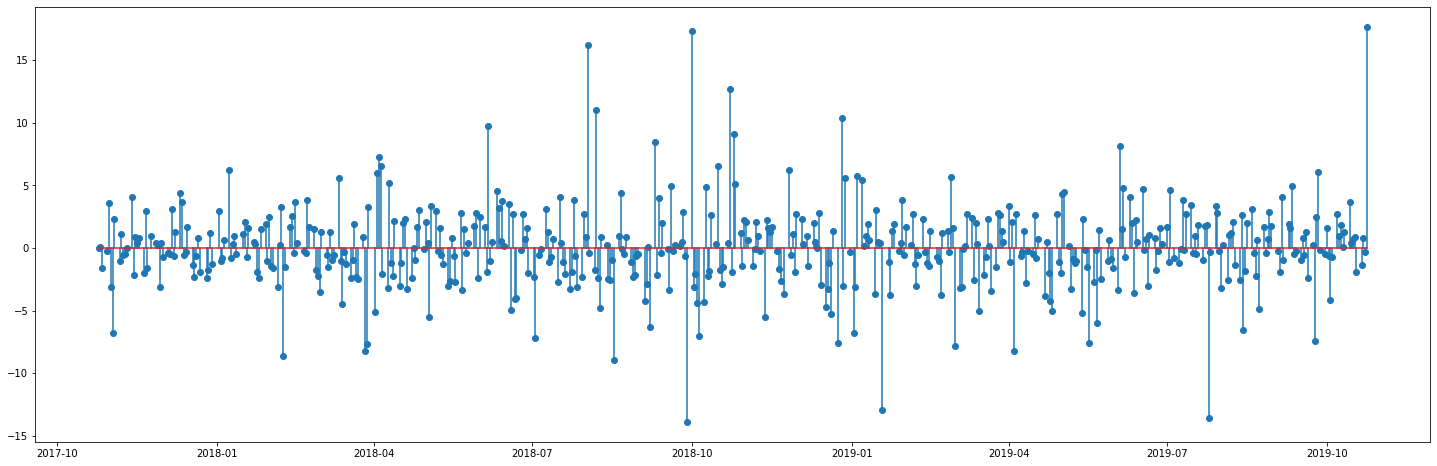

In [ ]:
plt.figure(figsize=(25,8))
plt.stem(da, df["day_perc_change"])

##2.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


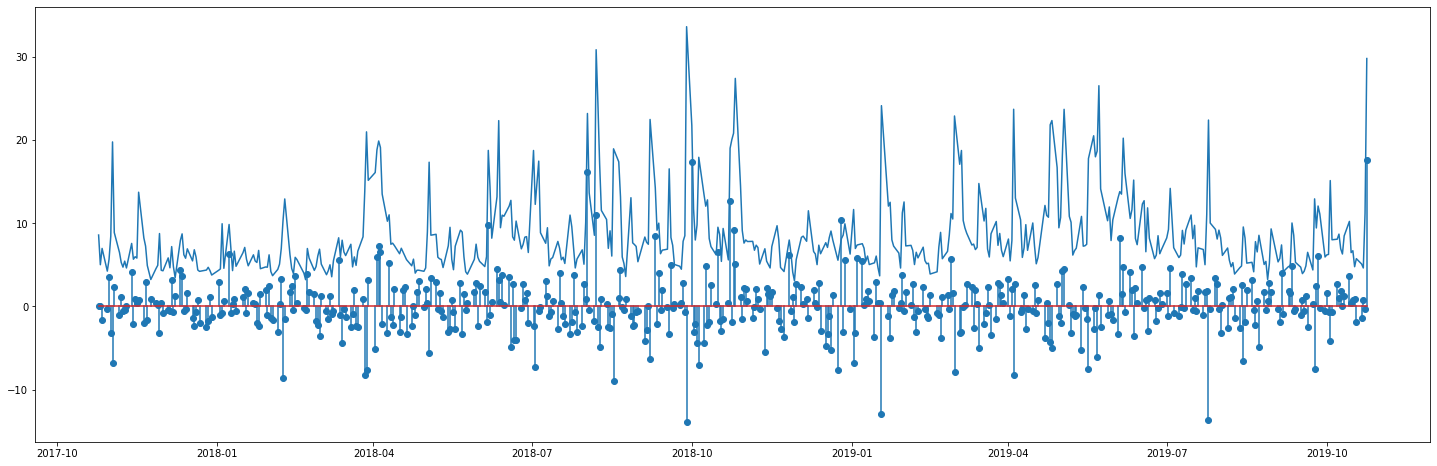

In [ ]:
plt.close()
plt.figure(figsize=(25,8))
plt.stem(da, df["day_perc_change"],label="stem")
plt.plot(df["Total Traded Quantity"]/1000000, label="volume")
plt.show()
plt.close()

##2.4

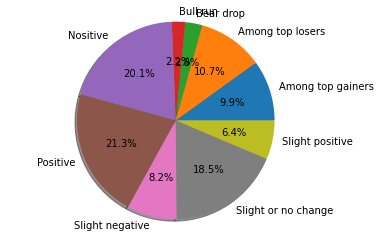

In [ ]:

df1=df.groupby(df['Trend']).count()
labels=df1.index.values
freq=df1['Close Price']

fig1, ax1 = plt.subplots()
ax1.pie(freq,labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.close()


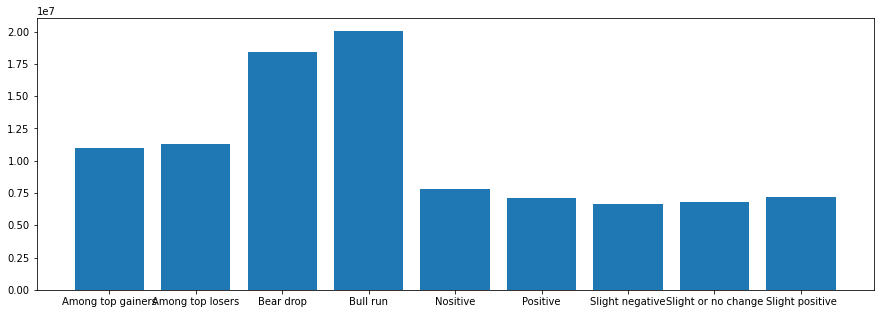

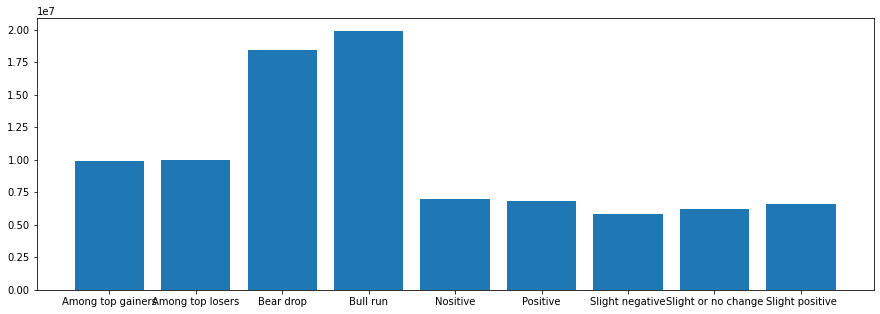

In [ ]:
y1=df.groupby(df['Trend']).mean()['Total Traded Quantity'].values
y2=df.groupby(df['Trend']).median()['Total Traded Quantity'].values
labels=df1.index.values

plt.figure(figsize=(15,5))
plt.bar(labels,y1)
plt.show()
plt.figure(figsize=(15,5))
plt.bar(labels,y2)
plt.show()
plt.close()


##2.5

(array([  3.,   7.,  21., 116., 238.,  94.,  15.,   5.,   1.,   3.]),
 array([-13.90153486, -10.74445818,  -7.58738149,  -4.43030481,
         -1.27322812,   1.88384856,   5.04092524,   8.19800193,
         11.35507861,  14.51215529,  17.66923198]),
 <a list of 10 Patch objects>)

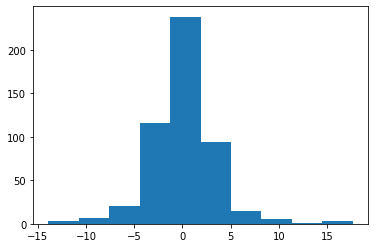

In [ ]:
plt.hist(df['day_perc_change'])

##2.6

In [ ]:
df5 = pd.DataFrame()
df1 = pd.read_csv('ASHOKA.csv')
df5["Ashoka"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('BAJAJELEC.csv')
df5["Bajajelec"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('BOMDYEING.csv')
df5["Bomdyeing"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('CENTURYPLY.csv')
df5["Centuryply"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('FORTIS.csv')
df5["Fortis"] = df1[df1["Series"] == "EQ"]["Close Price"]
df5.head()

,Ashoka,Bajajelec,Bomdyeing,Centuryply,Fortis
0,216.05,341.15,82.20,266.65,205.25
1,214.90,347.00,83.40,266.10,207.90
2,217.00,349.85,82.25,264.85,205.90
3,209.65,334.10,78.95,260.35,196.85
4,206.25,336.20,77.15,254.05,203.55


In [ ]:
df6=pd.DataFrame()
df6["Ashoka"] = (df5['Ashoka'].pct_change().dropna())*(100)
df6["Bajajelec"] = (df5['Bajajelec'].pct_change().dropna())*(100)
df6["Bomdyeing"] = (df5['Bomdyeing'].pct_change().dropna())*(100)
df6["Centuryply"] = (df5['Centuryply'].pct_change().dropna())*(100)
df6["Fortis"] = (df5['Fortis'].pct_change().dropna())*(100)

print(df6.head())


     Ashoka  Bajajelec  Bomdyeing  Centuryply    Fortis
1 -0.532284   1.714788   1.459854   -0.206263  1.291108
2  0.977199   0.821326  -1.378897   -0.469748 -0.962001
3 -3.387097  -4.501929  -4.012158   -1.699075 -4.395338
4 -1.621751   0.628554  -2.279924   -2.419819  3.403607
5 -2.254545  -6.826294  -4.082955    0.570754 -4.298698


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


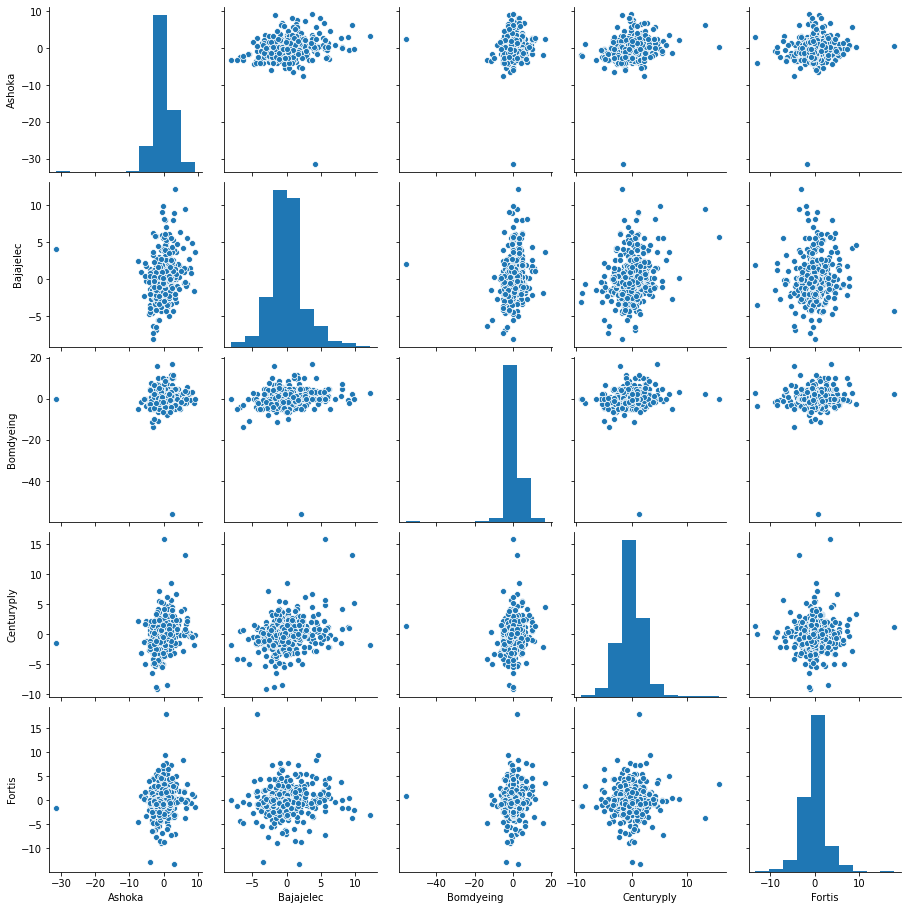

In [ ]:
import seaborn as sns

sns.pairplot(df6)
plt.show()

##2.7

Text(0.5, 1.0, 'Volatility')

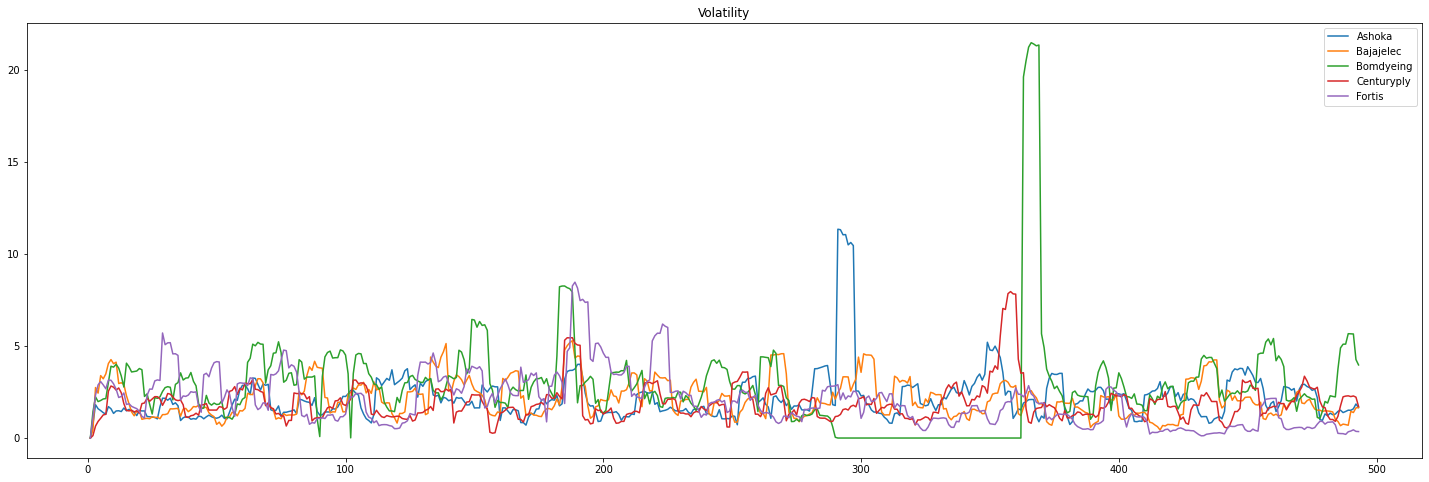

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(df6[['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis'])
plt.title('Volatility')

##2.8

Text(0.5, 1.0, 'Volatility')

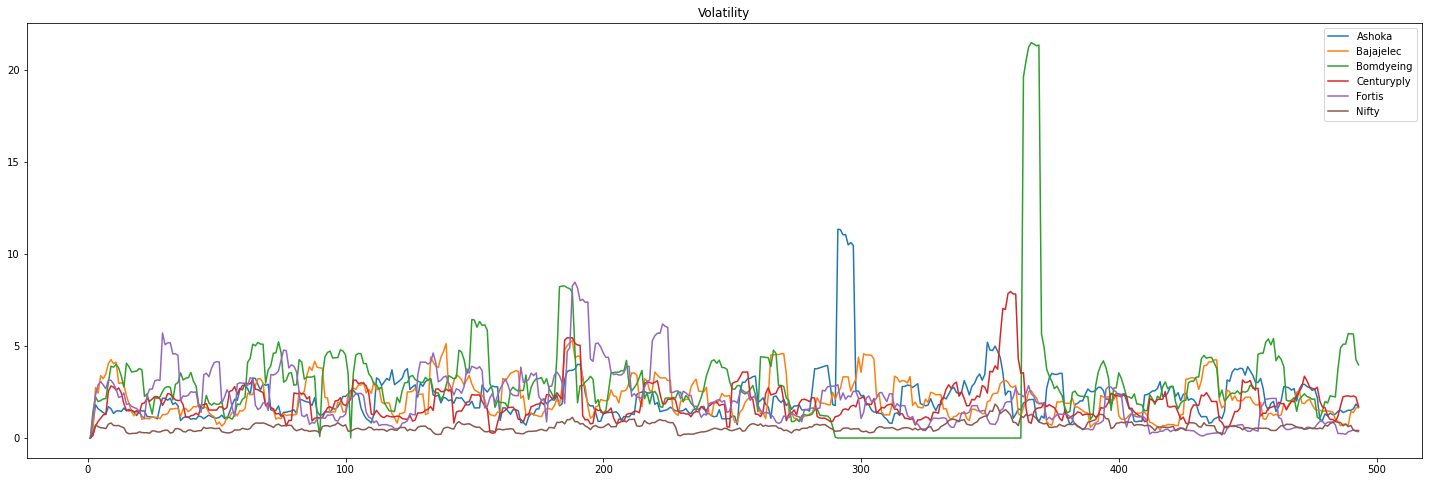

In [ ]:
dfn=pd.read_csv('Nifty50.csv')
df6['Nifty']=(dfn['Close'].pct_change().dropna())*(100)

plt.figure(figsize=(25,8))
plt.plot(df6[['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis','Nifty']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis','Nifty'])
plt.title('Volatility')


##2.9

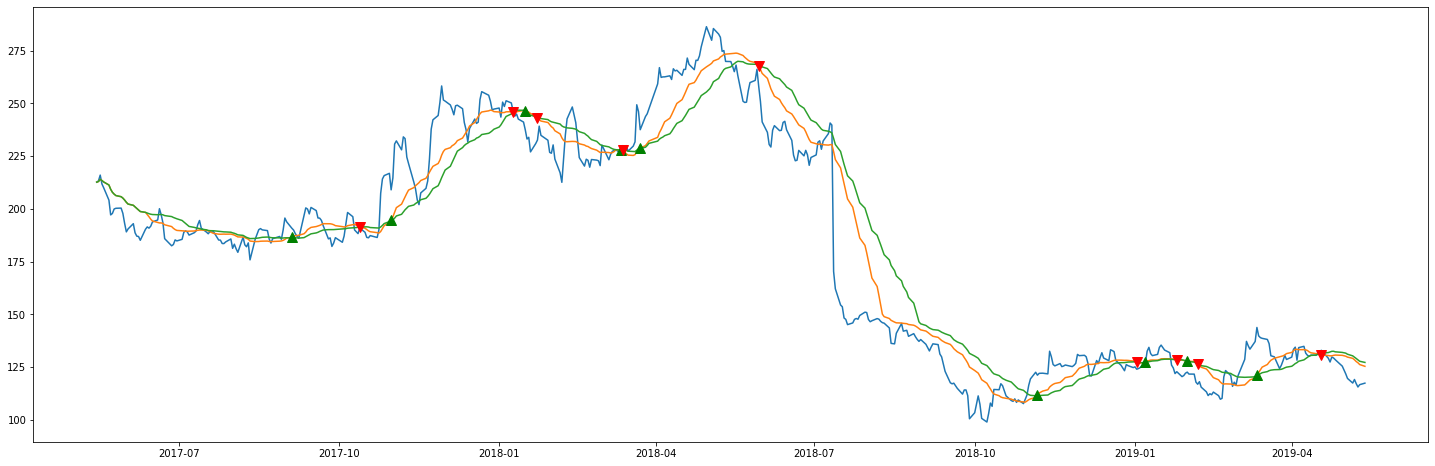

In [ ]:
plt.close()
df2=pd.read_csv('ASHOKA.csv')
dfp = pd.DataFrame()
dfp["Average Price"] = df2[df2["Series"] == "EQ"]["Average Price"]
dfp["Date"] = df2[df2["Series"] == "EQ"]["Date"]
dfp['Date']= pd.to_datetime(dfp['Date'])

date = pd.to_datetime(dfp['Date'])

dfp.set_index("Date", inplace = True)

dfp['21'] = dfp[["Average Price"]].rolling(21,min_periods=1).mean()
dfp['34'] = dfp[["Average Price"]].rolling(34,min_periods=1).mean()
plt.figure(figsize=(25,8))
plt.plot(dfp[["Average Price"]])
plt.plot(dfp['21'])
plt.plot(dfp['34'])

signals = pd.DataFrame(index=date)
signals['signal'] = 0
signals['signal'][21:] = np.where(dfp['21'][21:] > dfp['34'][21:], 1, 0)
signals['position'] = signals['signal'].diff().fillna(0)
signals['short_mavg'] = dfp['21'].tolist()
signals['long_mavg'] = dfp['34'].tolist()
signals.head()

plt.plot(signals.loc[signals.position == 1].index, signals['short_mavg'][signals.position == 1], '^', markersize=10, color='green', label='Buy')
plt.plot(signals.loc[signals.position == -1].index, signals['short_mavg'][signals.position == -1], 'v', markersize=10, color='red', label='Sell')

plt.show()


##2.10

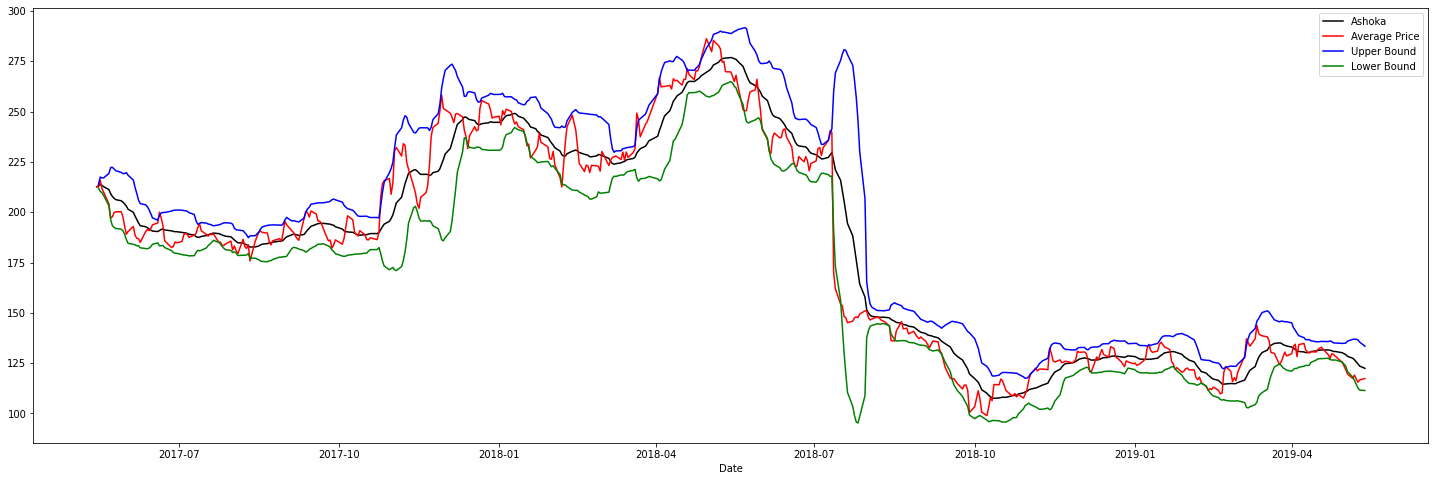

In [ ]:
ashoka_mean_14=df10[['Avg_P']].rolling(14,min_periods=1).mean()
ashoka_std_14=df10[['Avg_P']].rolling(14,min_periods=1).std()

upper = ashoka_mean_14 + 2*ashoka_std_14
lower = ashoka_mean_14 - 2*ashoka_std_14

plt.figure(figsize=(25,8))
plt.plot(ashoka_mean_14, color='black', label='Ashoka')
plt.plot(df10['Avg_P'], color='red', label='Average Price')
plt.plot(upper, color='blue', label='Upper Bound')
plt.plot(lower, color='green', label='Lower Bound')
plt.xlabel('Date')
plt.legend()
plt.show()
plt.close()